### Specific Test VI. SSL on Real Dataset
#### **Name**:potla naga sai bharath 
#### **Gmail**:[saibharathpotla29@gmail.com](mailto:saibharathpotla29@gmail.com)
**Task:** Build a Self-Supervised Learning model for classifying the images into lenses using PyTorch or Keras. Pick the most appropriate approach and discuss your strategy.

**Dataset Description:** The Dataset consists of two classes, strong lensing images with lenses and non-lenses in npy format. For non-lensing images, the images start with nl_. These images are from the Hubble Space Telescope.

**Evaluation Metrics:** ROC curve (Receiver Operating Characteristic curve) and AUC score (Area Under the ROC Curve). Although the dataset is small and results may not be perfect, the pipeline should be such that with more data, the model could achieve high performance.

*Trained model weigths for this task can be found in the respective folder in [HERE](https://drive.google.com/drive/folders/1DGug4hP0UZBG2zAVWiO5lAgrlnf95l_Q?usp=drive_link)*

**Strategy**:

After implementing an Equivariant Transformer architecture featuring custom RotationalConv2D layers designed for maintaining equivariance with respect to input rotations, we augment the model with a convolution operation applied to rotated inputs, followed by combining resulting feature maps through element-wise addition. Additionally, we leverage pre-trained ResNet50 weights for expedited learning of representations.

For the loss function, we opt for contrastive loss, which incentivizes the model to generate embeddings that are closer for similar images and farther apart for dissimilar ones. Specifically, we compute the sum of squared distances between positive pairs (where y_true = 1) and the squared hinge loss between negative pairs (where y_true = 0) with a designated margin.

Subsequently, post-training the embedding model, we fine-tune it for our classification task.

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
print(tf.__version__)

2.10.0


In [5]:


# Define the directory where your files are located
directory = '/kaggle/working/real_hst'

# Initialize lists to store the loaded data
nl_hst_data = []
hst_data = []

# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.endswith("_hst.npy"):
        if filename.startswith("nl_"):
            # Load files starting with "nl_" and ending with "_hst.npy"
            filepath = os.path.join(directory, filename)
            data = np.load(filepath)
            nl_hst_data.append(data)
        else:
            # Load files ending with "_hst.npy" but not starting with "nl_"
            filepath = os.path.join(directory, filename)
            data = np.load(filepath)
            hst_data.append(data)

# Now nl_hst_data contains data from files starting with "nl_" and ending with "_hst.npy"
# and hst_data contains data from files ending with "_hst.npy" but not starting with "nl_"


In [6]:

nl_hst_data = np.array(nl_hst_data )
hst_data=np.array(hst_data)

In [7]:
print(nl_hst_data.shape)
print(hst_data.shape)

(63, 334, 334)
(152, 334, 334)


In [8]:
nl_hst_data=nl_hst_data.reshape(63,334,334,1)
hst_data=hst_data.reshape(152,334,334,1)

In [9]:
print(nl_hst_data.shape)
print(hst_data.shape)

(63, 334, 334, 1)
(152, 334, 334, 1)


In [10]:

# Assuming your images are stored in a NumPy array called 'images'
# and you want to save them in PNG format in a folder named 'hr'
folder_name = '/kaggle/working/traning/havinglenses'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Loop through each image and save it
for i, image in enumerate(hst_data):
    # Reshape the image if necessary
    image = image.reshape((image.shape[0], image.shape[1]))
    # Save the image using OpenCV
    cv2.imwrite(os.path.join(folder_name, f'image_{i}.png'), image)

print("Images saved successfully.")


Images saved successfully.


In [11]:


# Assuming your images are stored in a NumPy array called 'images'
# and you want to save them in PNG format in a folder named 'hr'
folder_name = '/kaggle/working/traning/nohavinglenses'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Loop through each image and save it
for i, image in enumerate(nl_hst_data):
    # Reshape the image if necessary
    image = image.reshape((image.shape[0], image.shape[1]))
    # Save the image using OpenCV
    cv2.imwrite(os.path.join(folder_name, f'image_{i}.png'), image)

print("Images saved successfully.")


Images saved successfully.


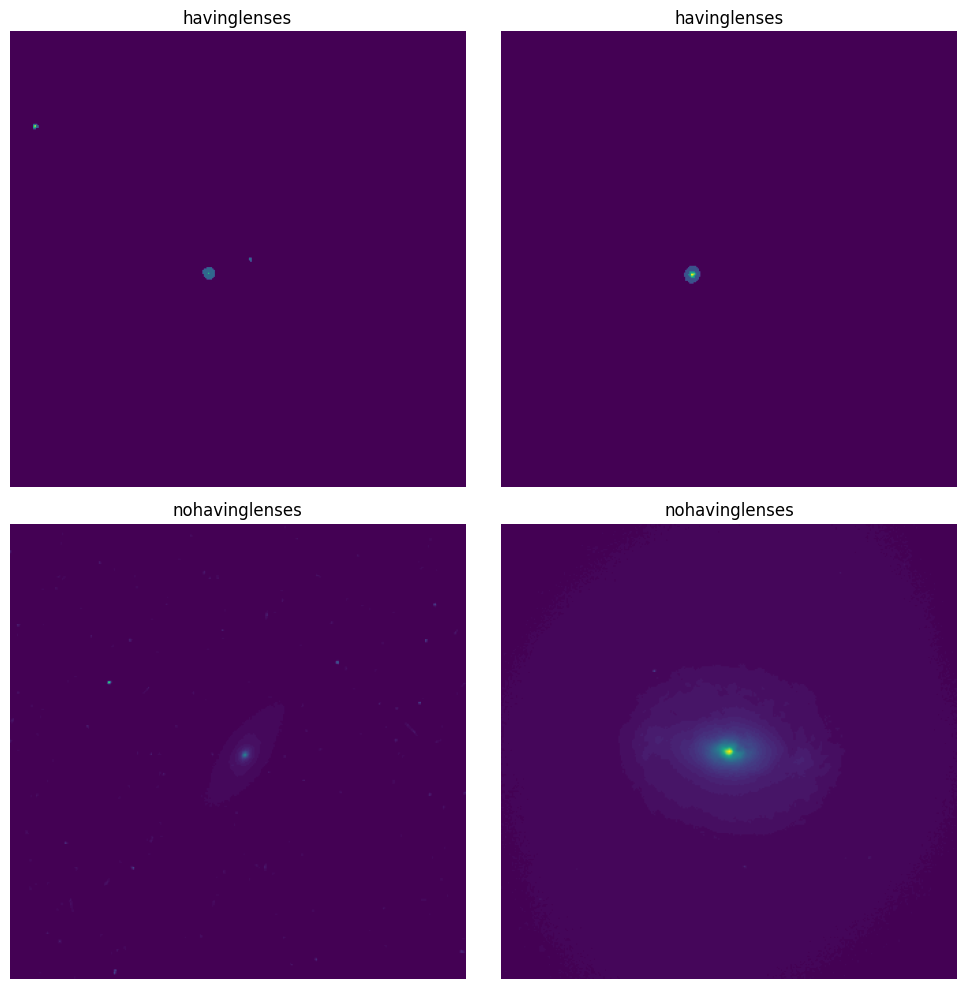

In [12]:


# Path to the training folder
training_folder = '/kaggle/working/traning'

# List the classes (subfolders) in the training folder
classes = os.listdir(training_folder)

# Plot five random images from each class in two rows
fig, axes = plt.subplots(2, 2, figsize=(10,10 ))

for i, class_name in enumerate(classes):
    class_folder = os.path.join(training_folder, class_name)
    if os.path.isdir(class_folder):
        # List images in the class folder
        images = os.listdir(class_folder)
        # Select five random images
        random_images = random.sample(images, 2)
        for j, random_image in enumerate(random_images):
            # Read the image
            image_path = os.path.join(class_folder, random_image)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Plot the image
            axes[i][j].imshow(image)
            axes[i][j].set_title(class_name)
            axes[i][j].axis('off')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


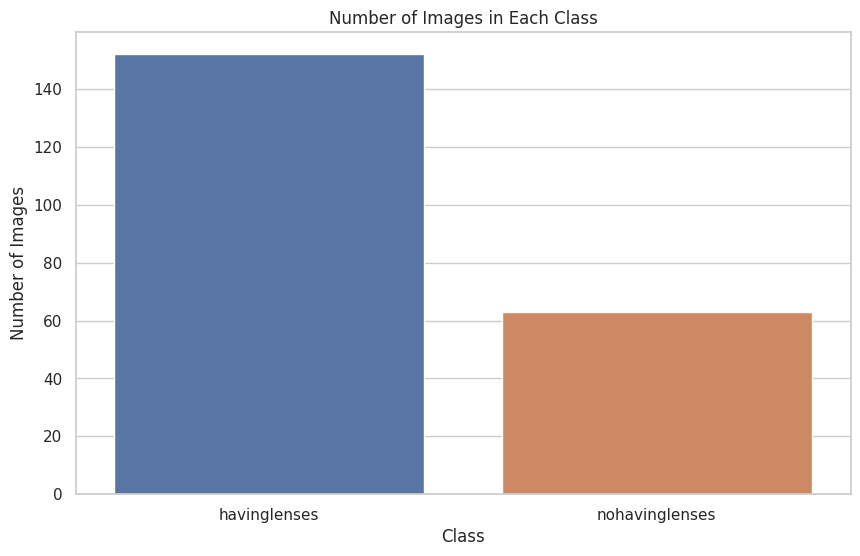

In [13]:
import seaborn as sns
def count_images_per_class(data_dir):
    classes = os.listdir(data_dir)
    class_counts = []

    for cls in classes:
        cls_path = os.path.join(data_dir, cls)
        if os.path.isdir(cls_path):
            images = [f for f in os.listdir(cls_path) if f.endswith('.png')]
            num_images = len(images)
            class_counts.append((cls, num_images))

    return class_counts

# Get the total number of images in each class
class_counts = count_images_per_class(training_folder)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=[cls[0] for cls in class_counts], y=[cls[1] for cls in class_counts])
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [14]:
!pip install tensorflow-addons
import os
import numpy as np
import tensorflow as tf
from keras import layers, models, optimizers, callbacks
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_addons as tfa
from keras.layers import BatchNormalization, ReLU, Dense, Input, GlobalAveragePooling2D, MultiHeadAttention
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import Sequence
import pandas as pd
import keras.backend as K
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Reshape, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, BatchNormalization, ReLU, Input, Lambda, MultiHeadAttention, LayerNormalization, Layer
from keras.models import Model
from keras.optimizers import Adam
from keras import layers, Model, Input
from keras.layers import Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Input, Lambda, Dense
from keras.losses import cosine_similarity


batch_size = 16
img_size = (334, 334)



# Data generator for classification
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory('/kaggle/working/traning',target_size=img_size,batch_size=batch_size,class_mode="binary",subset="training")
validation_generator = train_datagen.flow_from_directory('/kaggle/working/traning',target_size=img_size,batch_size=batch_size,class_mode="binary",subset="validation")
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.6.4 requires typeguard<5,>=4.1.2, but you have typeguard 2.13.3 which is incompatible.


2024-03-25 14:48:54.951308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 14:48:54.951436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 14:48:55.111330: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our Tens

Found 173 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [15]:
class RotationalConv2D(tf.keras.layers.Layer):
    def __init__(self, num_filters, kernel_size, padding='same', **kwargs):
        super(RotationalConv2D, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv2D(num_filters, kernel_size, padding=padding)

    def call(self, inputs):
        rotated_inputs = [inputs]
        for i in range(1, 4):
            rotated_inputs.append(tf.image.rot90(inputs, i))

        conv_outputs = []
        for rotated_input in rotated_inputs:
            conv_outputs.append(self.conv(rotated_input))

        output = tf.math.add_n(conv_outputs)
        return output

In [16]:
class EquivariantTransformer(tf.keras.layers.Layer):
    def __init__(self, num_filters, kernel_size, num_heads, **kwargs):
        super(EquivariantTransformer, self).__init__(**kwargs)
        self.conv1 = RotationalConv2D(num_filters, kernel_size, padding='same')
        self.bn1 = BatchNormalization()
        self.relu1 = ReLU()
        self.conv2 = RotationalConv2D(num_filters * 2, kernel_size, padding='same')
        self.bn2 = BatchNormalization()
        self.relu2 = ReLU()
        self.conv3 = RotationalConv2D(num_filters * 4, kernel_size, padding='same')
        self.bn3 = BatchNormalization()
        self.relu3 = ReLU()
        self.self_attention1 = MultiHeadAttention(num_heads=num_heads, key_dim=num_filters * 2)
        self.self_attention2 = MultiHeadAttention(num_heads=num_heads, key_dim=num_filters * 4)
        self.pooling = GlobalAveragePooling2D()

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        y = self.self_attention1(query=x, key=x, value=x)
        x = tf.add(x, y)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        y = self.self_attention2(query=x, key=x, value=x)
        x = tf.add(x, y)

        x = self.pooling(x)
        return x

In [17]:
def contrastive_loss(y_true, y_pred, margin=1.0):
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

In [18]:
input_layer = Input(shape=(334, 334, 3))
transfer_layer = tf.keras.applications.ResNet50(input_tensor=input_layer, include_top=False, weights='imagenet')
equivariant_transformer = EquivariantTransformer(num_filters=128, kernel_size=3, num_heads=3)
embedding_layer = Dense(150)

transfer_layer_output = transfer_layer.output

transformed_output = equivariant_transformer(transfer_layer_output)

embeddings = embedding_layer(transformed_output)

model = Model(inputs=input_layer, outputs=embeddings)

94765736/94765736 [==============================] - 0s 0us/step


In [19]:
model.compile(optimizer='adam', loss=contrastive_loss)

In [20]:
his=model.fit(train_generator,steps_per_epoch=steps_per_epoch, validation_data=validation_generator, validation_steps=validation_steps, epochs=30)

Epoch 1/30


I0000 00:00:1711378178.790589     144 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - 66s 2s/step - loss: 0.3731 - val_loss: 47930212352.0000
Epoch 2/30
10/10 [==============================] - 5s 453ms/step - loss: 0.2973 - val_loss: 21262621474816.0000
Epoch 3/30
10/10 [==============================] - 5s 455ms/step - loss: 0.2416 - val_loss: 250674413568.0000
Epoch 4/30
10/10 [==============================] - 5s 454ms/step - loss: 0.2218 - val_loss: 2221411.5000
Epoch 5/30
10/10 [==============================] - 5s 456ms/step - loss: 0.1861 - val_loss: 328690.6562
Epoch 6/30
10/10 [==============================] - 5s 455ms/step - loss: 0.2230 - val_loss: 0.5544
Epoch 7/30
10/10 [==============================] - 5s 467ms/step - loss: 0.2198 - val_loss: 0.5235
Epoch 8/30
10/10 [==============================] - 5s 460ms/step - loss: 0.2280 - val_loss: 0.6530
Epoch 9/30
10/10 [==============================] - 5s 463ms/step - loss: 0.1851 - val_loss: 798889.2500
Epoch 10/30
10/10 [==============================] - 5s 464ms/s

In [21]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import keras


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7)

additional_layer = Dense(16, activation='relu')(transformed_output)
classification_model = Dense(1, activation='sigmoid')(additional_layer)
model = Model(inputs=input_layer, outputs=classification_model)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
history=model.fit(train_generator,steps_per_epoch=steps_per_epoch, validation_data=validation_generator, validation_steps=validation_steps, epochs=50, callbacks=[reduce_lr])


Epoch 1/50
10/10 [==============================] - 44s 734ms/step - loss: 0.7177 - auc: 0.5574 - val_loss: 1.1058 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 5s 472ms/step - loss: 0.7010 - auc: 0.5578 - val_loss: 0.6900 - val_auc: 0.5000 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 5s 473ms/step - loss: 0.6782 - auc: 0.5838 - val_loss: 0.6895 - val_auc: 0.5000 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 5s 479ms/step - loss: 0.6777 - auc: 0.5039 - val_loss: 0.6871 - val_auc: 0.5000 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 5s 481ms/step - loss: 0.6706 - auc: 0.5726 - val_loss: 0.6856 - val_auc: 0.5000 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 5s 486ms/step - loss: 0.6951 - auc: 0.5633 - val_loss: 0.6857 - val_auc: 0.5000 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 5s 481ms/step - loss: 0.6687 - auc: 0.5652 - val_loss: 0.6827 - val_auc: 0.50

In [22]:
model.save('lens_classifier.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from keras.models import load_model
loaded_model = load_model('lens_classifier.h5', custom_objects={'EquivariantTransformer': EquivariantTransformer}, compile=False)

In [24]:
y_true = []
y_pred = []

for i in range(3):
    X_batch, y_batch = validation_generator[i]
    y_true.extend(y_batch)
    y_pred.extend(loaded_model.predict(X_batch))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 [==============================] - 2s 2s/step


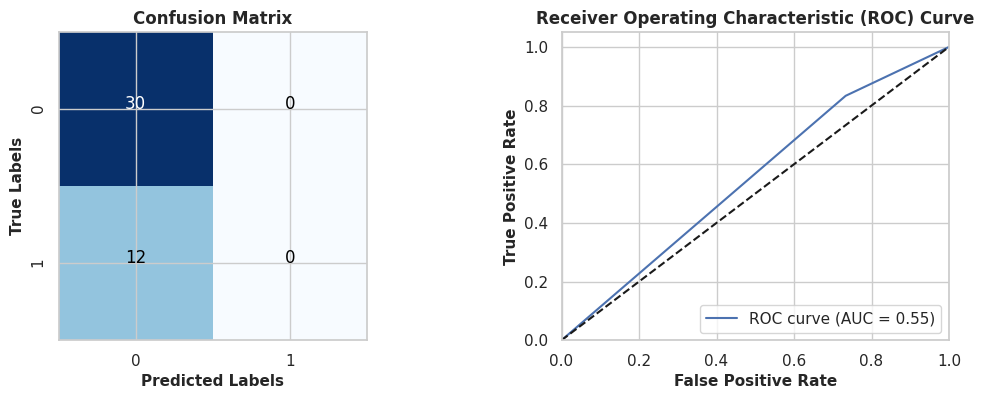

In [25]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_true is a binary array
y_true = np.array(y_true, dtype=int)

# Binarize y_pred
y_pred_binary = np.round(y_pred)

plt.figure(figsize=(12, 4)) 

cm = confusion_matrix(y_true, y_pred_binary)
plt.subplot(121)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=11, fontweight='bold')
plt.ylabel('True Labels', fontsize=11, fontweight='bold')

tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1], rotation=90)

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.subplot(122)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=11, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=11, fontweight='bold')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.4)
plt.show()
